In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
api_token = {"username":"jadidjadid","key":"e1bb1d75c027991ab119142bd179c161"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

 99% 1.75G/1.76G [00:15<00:00, 150MB/s]
100% 1.76G/1.76G [00:15<00:00, 124MB/s]


In [5]:
!unzip lung-and-colon-cancer-histopathological-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [6]:
colon_aca_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_aca"
os.makedirs('/content/model_cell_images/train/colon_aca') 
os.makedirs('/content/model_cell_images/validation/colon_aca')
os.makedirs('/content/model_cell_images/test/colon_aca')




colon_n_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_n"
os.makedirs('/content/model_cell_images/train/colon_n') 
os.makedirs('/content/model_cell_images/validation/colon_n')
os.makedirs('/content/model_cell_images/test/colon_n')

In [7]:
import os
import shutil

colon_aca_train= "/content/model_cell_images/train/colon_aca"
colon_aca_validation= "/content/model_cell_images/validation/colon_aca"
colon_aca_test= "/content/model_cell_images/test/colon_aca"

filesun1 = os.listdir(colon_aca_dataset)
for file in filesun1[0:int(len(filesun1) * .8)]:
  new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_train)


filesun2 = os.listdir(colon_aca_dataset)
for file in filesun2[0:int(len(filesun1) * .19)]:
  new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_validation)

  
filesun3 = os.listdir(colon_aca_dataset)
for file in filesun3:
    new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_test)  

In [8]:


colon_n_train= "/content/model_cell_images/train/colon_n"
colon_n_validation= "/content/model_cell_images/validation/colon_n"
colon_n_test= "/content/model_cell_images/test/colon_n"

filespr1 = os.listdir(colon_n_dataset)
for file in filespr1[0:int(len(filespr1) * .8)]:
  new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_train)


filespr1 = os.listdir(colon_n_dataset)
for file in filespr1[0:int(len(filespr1) * .19)]:
  new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_validation)

  
filespr2 = os.listdir(colon_n_dataset)
for file in filespr2:
    new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_test)  

In [9]:
import os
base_dir = '/content/model_cell_images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_colon_aca_dir = os.path.join(train_dir, 'colon_aca')
train_colon_n_dir = os.path.join(train_dir, 'colon_n')

validation_colon_aca_dir = os.path.join(validation_dir, 'colon_aca')
validation_colon_n_dir = os.path.join(validation_dir, 'colon_n')

test_colon_aca_dir = os.path.join(test_dir, 'colon_aca')
test_colon_n_dir = os.path.join(test_dir, 'colon_n')


In [10]:
print('total training colon_aca images:', len(os.listdir(train_colon_aca_dir)))
print('total training colon_n images:', len(os.listdir(train_colon_n_dir)))

print('total test colon_aca images:', len(os.listdir(test_colon_aca_dir)))
print('total test colon_n images:', len(os.listdir(test_colon_n_dir)))

print('total test colon_aca images:', len(os.listdir(test_colon_aca_dir)))
print('total test colon_n images:', len(os.listdir(test_colon_n_dir)))

total training colon_aca images: 4000
total training colon_n images: 4000
total test colon_aca images: 50
total test colon_n images: 810
total test colon_aca images: 50
total test colon_n images: 810


In [11]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

#melakukan rescaling, rotate,zoom, flip horizontal
batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
#melakukan class mode= metode pemilihan clasifikasi, taret size= dimensi citra, batch size= banyak citra yg dimasukkan setiap step, shuffle= acak data tida sesusai alfabetik
train_aug = augmen_gen.flow_from_directory(
    '/content/model_cell_images/train',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb'
)

val_aug = augmen_gen.flow_from_directory(
    '/content/model_cell_images/validation',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb'
)

test_aug = augmen_gen.flow_from_directory(
    '/content/model_cell_images/test',
    class_mode = 'categorical',
    shuffle=False,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb',
)

Found 8000 images belonging to 2 classes.
Found 1140 images belonging to 2 classes.
Found 860 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout

# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='elu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

In [13]:
model2.add(Dense(128, activation='elu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

In [14]:
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 16)     64        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 125, 125, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                        

In [15]:
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.000001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
H2 = model2.fit(train_aug, steps_per_epoch=2, epochs=100, validation_data=test_aug, validation_steps=2, verbose=2)

Epoch 1/100
2/2 - 17s - loss: 0.9275 - acc: 0.5625 - val_loss: 0.6434 - val_acc: 0.7812 - 17s/epoch - 8s/step
Epoch 2/100
2/2 - 4s - loss: 0.9608 - acc: 0.4844 - val_loss: 0.6500 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 3/100
2/2 - 4s - loss: 1.0326 - acc: 0.5312 - val_loss: 0.6547 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 4/100
2/2 - 4s - loss: 1.1303 - acc: 0.3750 - val_loss: 0.6605 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 5/100
2/2 - 4s - loss: 0.9034 - acc: 0.6250 - val_loss: 0.6669 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 6/100
2/2 - 4s - loss: 0.9312 - acc: 0.5781 - val_loss: 0.6733 - val_acc: 0.7656 - 4s/epoch - 2s/step
Epoch 7/100
2/2 - 4s - loss: 0.9040 - acc: 0.5781 - val_loss: 0.6841 - val_acc: 0.7031 - 4s/epoch - 2s/step
Epoch 8/100
2/2 - 4s - loss: 1.0196 - acc: 0.5000 - val_loss: 0.6894 - val_acc: 0.6406 - 4s/epoch - 2s/step
Epoch 9/100
2/2 - 4s - loss: 0.9186 - acc: 0.6406 - val_loss: 0.6985 - val_acc: 0.5000 - 4s/epoch - 2s/step
Epoch 10/100
2/2 - 4s - lo

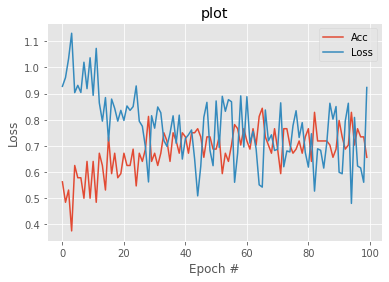

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["acc"], label="Acc")
plt.plot(np.arange(0, 100), H2.history["loss"], label="Loss")
plt.title("plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import classification_report

ypred = model2.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       0.24      0.68      0.35        50
           1       0.98      0.86      0.92       810

    accuracy                           0.85       860
   macro avg       0.61      0.77      0.63       860
weighted avg       0.93      0.85      0.88       860



In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D

model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D(data_format='channels_last'))
model.add(Flatten())


In [21]:
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [22]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)      

In [23]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.000001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
H = model.fit(train_aug, steps_per_epoch=2, epochs=100, validation_data=test_aug, validation_steps=2, verbose=2)

Epoch 1/100
2/2 - 6s - loss: 0.6573 - acc: 0.6406 - val_loss: 0.6690 - val_acc: 0.7812 - 6s/epoch - 3s/step
Epoch 2/100
2/2 - 4s - loss: 0.7059 - acc: 0.5312 - val_loss: 0.6690 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 3/100
2/2 - 4s - loss: 0.7067 - acc: 0.5000 - val_loss: 0.6672 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 4/100
2/2 - 4s - loss: 0.7006 - acc: 0.5156 - val_loss: 0.6689 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 5/100
2/2 - 4s - loss: 0.6858 - acc: 0.6250 - val_loss: 0.6672 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 6/100
2/2 - 4s - loss: 0.6995 - acc: 0.5938 - val_loss: 0.6679 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 7/100
2/2 - 4s - loss: 0.7092 - acc: 0.5312 - val_loss: 0.6687 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 8/100
2/2 - 4s - loss: 0.7382 - acc: 0.3906 - val_loss: 0.6679 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 9/100
2/2 - 4s - loss: 0.7120 - acc: 0.5000 - val_loss: 0.6689 - val_acc: 0.7812 - 4s/epoch - 2s/step
Epoch 10/100
2/2 - 4s - loss

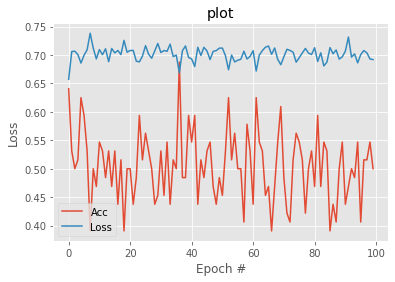

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="Acc")
plt.plot(np.arange(0, 100), H.history["loss"], label="Loss")
plt.title("plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import classification_report

ypred = model.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       0.06      1.00      0.11        50
           1       0.00      0.00      0.00       810

    accuracy                           0.06       860
   macro avg       0.03      0.50      0.05       860
weighted avg       0.00      0.06      0.01       860



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
model2.save('drive/MyDrive/MLModule/DropoutModel.h5')
model.save('drive/MyDrive/MLModule/DropoutModel.h5')